In [304]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [305]:
train = pd.read_csv('data/train.csv')
weather = pd.read_csv('data/weather.csv')
train['id'] = train.index
# train.shape

In [306]:
# Create a function to rename columns to lower case
def columns_rename(columns):
    """ Rename column names to lower case"""
    return columns.lower()

train.columns = [columns_rename(col) for col in train.columns]
weather.columns = [columns_rename(col) for col in weather.columns]

In [307]:
train['date'] = pd.to_datetime(train['date'])
weather['date'] = pd.to_datetime(weather['date'])

In [308]:
# set date to be index
# weather.set_index('date', inplace=True)

# sort index
# weather.sort_index(inplace=True)

## Cleaning and EDA of Weather Data

## Tmax

(array([ 30.,  98., 164., 312., 389., 492., 807., 495., 135.,  22.]),
 array([ 41. ,  47.3,  53.6,  59.9,  66.2,  72.5,  78.8,  85.1,  91.4,
         97.7, 104. ]),
 <BarContainer object of 10 artists>)

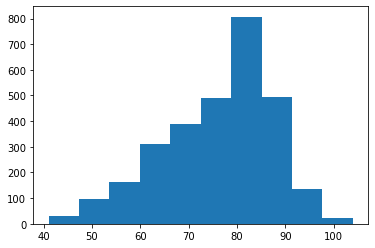

In [309]:
plt.hist(weather['tmax'])

In [310]:
weather['tmax'].describe()

count    2944.000000
mean       76.166101
std        11.461970
min        41.000000
25%        69.000000
50%        78.000000
75%        85.000000
max       104.000000
Name: tmax, dtype: float64

## Tmin

(array([ 42., 103., 289., 332., 354., 610., 541., 522., 129.,  22.]),
 array([29. , 34.4, 39.8, 45.2, 50.6, 56. , 61.4, 66.8, 72.2, 77.6, 83. ]),
 <BarContainer object of 10 artists>)

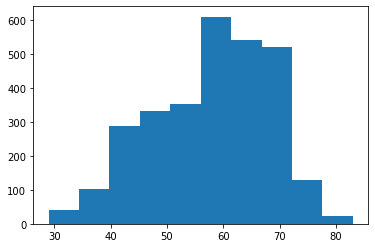

In [311]:
plt.hist(weather['tmin'])

(array([ 42., 103., 289., 332., 354., 610., 541., 522., 129.,  22.]),
 array([29. , 34.4, 39.8, 45.2, 50.6, 56. , 61.4, 66.8, 72.2, 77.6, 83. ]),
 <BarContainer object of 10 artists>)

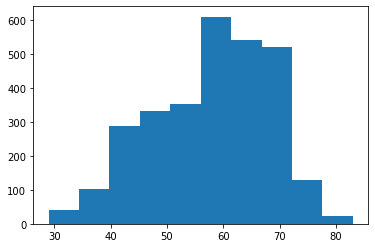

In [312]:
plt.hist(weather['tmin'])

## Tavg

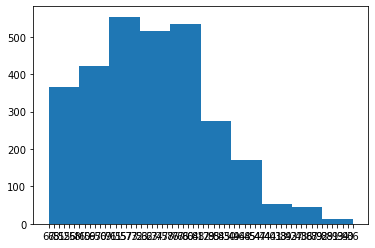

In [313]:
plt.hist(weather['tavg']);

In [314]:
weather['tavg'].value_counts();

There are 11 'M' values, which are missing values

In [315]:
def impute_missing_tavg(row):
    if row['tavg'] == 'M': 
        row['tavg'] = (row['tmax'] + row['tmin']) * 0.5 
    return row



In [316]:
weather = weather.apply(impute_missing_tavg, axis = 1)


In [317]:
#weather.info()

In [318]:
weather.tavg = weather.tavg.astype('int64')

## Sunrise and Sunset

In [319]:
station1 = weather[weather['station']==1].copy()
station2 = weather[weather['station']==2].copy()

In [320]:
station1.reset_index(inplace=True)

In [321]:
station2.reset_index(inplace=True)

In [322]:
weather[weather['tavg']=="M"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed


In [323]:
station2["sunrise"].head()

0    -
1    -
2    -
3    -
4    -
Name: sunrise, dtype: object

In [324]:
station2["sunrise"]= station1["sunrise"]

In [325]:
station2["sunrise"].head()

0    0448
1    0447
2    0446
3    0444
4    0443
Name: sunrise, dtype: object

In [326]:
weather = pd.concat([station1,station2],axis=0)


In [327]:
weather.reset_index().head()

,level_0,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,0,0,1,2007-05-01,83,50,67,14,51,56,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,1,2,1,2007-05-02,59,42,51,-3,42,47,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,2,4,1,2007-05-03,66,46,56,2,40,48,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
3,3,6,1,2007-05-04,66,49,58,4,41,50,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
4,4,8,1,2007-05-05,66,53,60,5,38,49,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0


In [328]:

weather.drop(columns=["index"],inplace = True)

## Depart

(array([ 335.,  177.,  149.,  239.,  210.,  264.,   27.,   31.,   28.,
        1484.]),
 array([ 0. ,  4.1,  8.2, 12.3, 16.4, 20.5, 24.6, 28.7, 32.8, 36.9, 41. ]),
 <BarContainer object of 10 artists>)

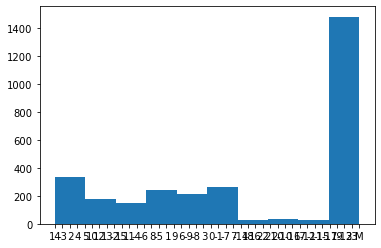

In [329]:
plt.hist(weather['depart'])

In [330]:
weather['depart'].value_counts();

In [331]:
weather.head(6)

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
3,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
4,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
5,1,2007-05-06,68,49,59,4,30,46,6,0,...,,0,M,0.0,0.00,29.57,30.29,14.4,11,15.0


In [332]:
station1 = weather[weather['station']==1].copy()
station2 = weather[weather['station']==2].copy()


In [333]:
station1.reset_index(inplace=True)

In [334]:
station2.reset_index(inplace=True)

In [335]:
station1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        1472 non-null   int64         
 1   station      1472 non-null   int64         
 2   date         1472 non-null   datetime64[ns]
 3   tmax         1472 non-null   int64         
 4   tmin         1472 non-null   int64         
 5   tavg         1472 non-null   int64         
 6   depart       1472 non-null   object        
 7   dewpoint     1472 non-null   int64         
 8   wetbulb      1472 non-null   object        
 9   heat         1472 non-null   object        
 10  cool         1472 non-null   object        
 11  sunrise      1472 non-null   object        
 12  sunset       1472 non-null   object        
 13  codesum      1472 non-null   object        
 14  depth        1472 non-null   object        
 15  water1       1472 non-null   object        
 16  snowfa

In [336]:
station1.depart= station1.depart.astype('int64')

In [337]:
station2["depart"] = station2["tavg"] - (station1["tavg"]- station1["depart"]) 

In [338]:
station2["depart"]

0       15
1       -2
2        4
3       10
4        5
        ..
1467    19
1468    10
1469    -2
1470    -1
1471    -4
Name: depart, Length: 1472, dtype: int64

In [339]:
weather = pd.concat([station1,station2],axis=0)
weather.reset_index().head()
weather.drop(columns=["index"],inplace = True)

In [340]:
weather.tail()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1467,2,2014-10-27,79,54,67,19,52,59,0,2,...,RA,M,M,M,0.02,29.00,29.67,12.7,19,13.6
1468,2,2014-10-28,66,48,57,10,40,48,8,0,...,RA,M,M,M,0.03,29.23,29.85,14.0,26,14.6
1469,2,2014-10-29,49,40,45,-2,34,42,20,0,...,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
1470,2,2014-10-30,53,37,45,-1,35,42,20,0,...,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
1471,2,2014-10-31,49,34,42,-4,29,36,23,0,...,RA SN BR,M,M,M,0.04,29.54,30.20,21.7,34,22.6


## Dewpoint

(array([ 26.,  89., 146., 308., 323., 459., 624., 467., 393., 109.]),
 array([22. , 27.3, 32.6, 37.9, 43.2, 48.5, 53.8, 59.1, 64.4, 69.7, 75. ]),
 <BarContainer object of 10 artists>)

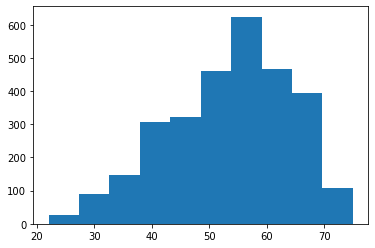

In [341]:
plt.hist(weather['dewpoint'])

In [342]:
weather['dewpoint'].describe()

count    2944.000000
mean       53.457880
std        10.675181
min        22.000000
25%        46.000000
50%        54.000000
75%        62.000000
max        75.000000
Name: dewpoint, dtype: float64

# Wetbulb

(array([312., 492., 409., 384., 549., 426., 189., 108.,  32.,  43.]),
 array([ 0. ,  4.7,  9.4, 14.1, 18.8, 23.5, 28.2, 32.9, 37.6, 42.3, 47. ]),
 <BarContainer object of 10 artists>)

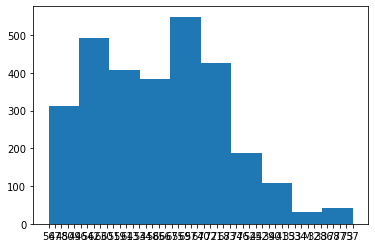

In [343]:
plt.hist(weather['wetbulb'])

In [344]:
weather['wetbulb'].describe()

count     2944
unique      48
top         63
freq       135
Name: wetbulb, dtype: object

In [345]:
weather['wetbulb'].value_counts()

63    135
65    131
59    129
61    123
64    121
62    118
67    117
66    113
60    111
69    107
57    105
70    102
71     99
55     99
68     98
58     95
56     95
52     78
46     72
72     71
53     69
47     61
51     57
54     56
73     56
50     55
45     53
48     51
49     50
74     50
44     45
42     35
40     31
43     31
75     20
41     19
38     17
39     15
36      9
76      8
35      8
77      8
34      5
33      5
37      5
M       4
32      1
78      1
Name: wetbulb, dtype: int64

In [346]:
weather[weather['wetbulb'] =="M"]


,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
424,1,2009-06-26,86,69,78,7,60,M,0,13,...,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
1205,1,2013-08-10,81,64,73,0,57,M,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
1206,1,2013-08-11,81,60,71,-2,61,M,0,6,...,RA,0,M,0.0,0.01,29.35,30.07,2.0,27,3.0
1207,2,2013-08-12,85,69,77,4,63,M,0,12,...,RA,M,M,M,0.66,29.27,29.92,4.5,26,7.7


In [347]:
weather[weather['date'] == "2009-06-26"]


,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
424,1,2009-06-26,86,69,78,7,60,M,0,13,...,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
424,2,2009-06-26,86,72,79,8,61,67,0,14,...,,M,M,M,0.00,29.20,29.83,6.4,4,8.0


In [348]:
weather.iloc[424,7] = 67

In [349]:
weather[weather['date'] == "2013-08-10"]


,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1205,1,2013-08-10,81,64,73,0,57,M,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
1205,2,2013-08-10,81,68,75,2,55,63,0,10,...,,M,M,M,0.00,M,30.07,6.0,6,7.4


In [350]:
weather.iloc[1205,7] = 63

In [351]:
weather[weather['date'] == "2013-08-11"]


,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1206,1,2013-08-11,81,60,71,-2,61,M,0,6,...,RA,0,M,0.0,0.01,29.35,30.07,2.0,27,3.0
1206,2,2013-08-11,84,63,74,1,57,64,0,9,...,,M,M,M,T,29.42,30.06,4.0,24,5.4


In [352]:
weather.iloc[1206,7] = 64

In [353]:
weather[weather['date'] == "2013-08-12"]


,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1207,1,2013-08-12,82,67,75,2,65,68,0,10,...,RA DZ,0,M,0.0,0.27,29.21,29.93,3.5,27,7.5
1207,2,2013-08-12,85,69,77,4,63,M,0,12,...,RA,M,M,M,0.66,29.27,29.92,4.5,26,7.7


In [354]:
weather.iloc[2679,7] = 68

## Heat and Cool

(array([1952.,  155.,  185.,  214.,  172.,  100.,   87.,   26.,   24.,
          29.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

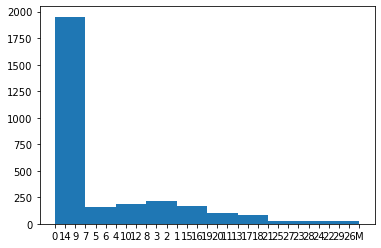

In [355]:
plt.hist(weather['heat'])

In [356]:
weather['heat'].describe()

count     2944
unique      31
top          0
freq      1870
Name: heat, dtype: object

In [357]:
weather['heat'].value_counts()

0     1870
4       88
1       86
2       81
8       67
3       66
5       61
15      57
12      49
7       49
10      48
11      48
9       46
13      46
6       45
14      36
16      29
20      28
18      24
19      24
21      19
17      17
23      15
22      12
M       11
24       7
25       5
26       4
27       2
28       2
29       2
Name: heat, dtype: int64

In [358]:
weather.head(10)

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
3,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
4,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
5,1,2007-05-06,68,49,59,4,30,46,6,0,...,,0,M,0.0,0.00,29.57,30.29,14.4,11,15.0
6,1,2007-05-07,83,47,65,10,41,54,0,0,...,RA,0,M,0.0,T,29.38,30.12,8.6,18,10.5
7,1,2007-05-08,82,54,68,12,58,62,0,3,...,BR,0,M,0.0,0.00,29.29,30.03,2.7,11,5.8
8,1,2007-05-09,77,61,69,13,59,63,0,4,...,BR HZ,0,M,0.0,0.13,29.21,29.94,3.9,9,6.2
9,1,2007-05-10,84,56,70,14,52,60,0,5,...,BR,0,M,0.0,0.00,29.20,29.92,0.7,17,4.1


It appears that heat has a value when it tavg is below 65, and takes on a value of 65-tavg, while cool has a value when tavg is above 65, and takes on a value of tavg-65. On the documentation this reads as "Heating" and "Cooling", which might refer to the heating and cooling effect required.

In [359]:
def impute_missing_heat_cool(row): 
    if row['heat'] == 'M':
        if row['tavg'] < 65: 
            row['heat'] = 65 - row['tavg']
            row['cool'] = 0
        else: 
            row['heat'] = 0
            row['cool'] = row['tavg'] - 65
    return row

In [360]:
weather = weather.apply(impute_missing_heat_cool, axis = 1)


In [361]:
weather.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
3,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
4,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0


In [362]:
weather[weather['heat']=="M"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed


## Depth

(array([1472.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1472.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

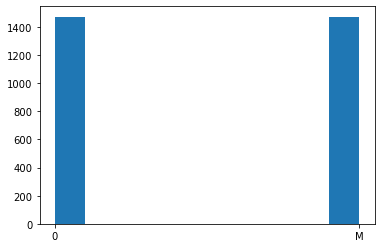

In [363]:
plt.hist(weather['depth'])

In [364]:
weather['depth'].describe()

count     2944
unique       2
top          0
freq      1472
Name: depth, dtype: object

In [365]:
weather['depth'] = 0

## Water 1

(array([   0.,    0.,    0.,    0.,    0., 2944.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

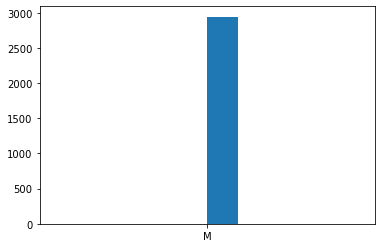

In [366]:
plt.hist(weather['water1'])

In [367]:
weather['water1'].describe()

count     2944
unique       1
top          M
freq      2944
Name: water1, dtype: object

## SnowFall

(array([1.459e+03, 0.000e+00, 0.000e+00, 1.200e+01, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.472e+03]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

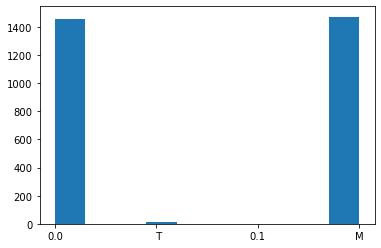

In [368]:
plt.hist(weather['snowfall'])

In [369]:
weather['snowfall'].describe()

count     2944
unique       4
top          M
freq      1472
Name: snowfall, dtype: object

In [370]:
weather[["date","station","snowfall"]].head(20)

,date,station,snowfall
0,2007-05-01,1,0.0
1,2007-05-02,1,0.0
2,2007-05-03,1,0.0
3,2007-05-04,1,0.0
4,2007-05-05,1,0.0
5,2007-05-06,1,0.0
6,2007-05-07,1,0.0
7,2007-05-08,1,0.0
8,2007-05-09,1,0.0
9,2007-05-10,1,0.0


In [371]:
station1 = weather[weather['station']==1].copy()
station2 = weather[weather['station']==2].copy()
station1.reset_index(inplace=True)
station2.reset_index(inplace=True)

In [372]:
station2["snowfall"]= station1["snowfall"]

In [373]:
weather = pd.concat([station1,station2],axis=0)
weather.reset_index().head()
weather.drop(columns=["index"],inplace = True)

## PrecipTotal

(array([2281.,  217.,  135.,   55.,   81.,   56.,   42.,   35.,   22.,
          20.]),
 array([  0. ,  16.7,  33.4,  50.1,  66.8,  83.5, 100.2, 116.9, 133.6,
        150.3, 167. ]),
 <BarContainer object of 10 artists>)

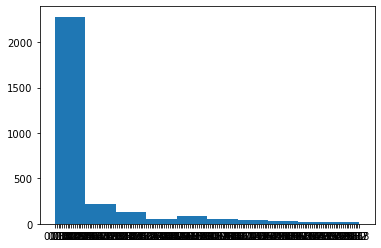

In [374]:
plt.hist(weather['preciptotal'])

In [375]:
weather['preciptotal'].describe()

count     2944
unique     168
top       0.00
freq      1577
Name: preciptotal, dtype: object

In [376]:
count = 0
for i in weather['preciptotal']:
    if i == "M":
        count += 1
print(count)

2


In [377]:
weather[weather['preciptotal'] =="M"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
58,2,2007-06-28,73,61,67,-4,56,61,0,2,...,,0,M,0.0,M,29.43,30.07,12.2,2,13.3
59,2,2007-06-29,71,56,64,-7,56,60,1,0,...,,0,M,0.0,M,29.47,30.11,7.4,2,8.2


In [378]:
weather[weather['date'] =="2007-06-28"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
58,1,2007-06-28,74,58,66,-5,55,60,0,1,...,,0,M,0.0,0.00,29.41,30.09,11.9,3,12.5
58,2,2007-06-28,73,61,67,-4,56,61,0,2,...,,0,M,0.0,M,29.43,30.07,12.2,2,13.3


In [379]:
weather[weather['date'] =="2007-06-29"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
59,1,2007-06-29,70,56,63,-8,55,59,2,0,...,,0,M,0.0,0.00,29.41,30.13,7.6,2,8.3
59,2,2007-06-29,71,56,64,-7,56,60,1,0,...,,0,M,0.0,M,29.47,30.11,7.4,2,8.2


We will adjust the precip total down to 0.

In [380]:
def impute_missing_precip(row): 
    if row['preciptotal'] == 'M':
        row['preciptotal'] = 0
    return row

In [381]:
weather = weather.apply(impute_missing_precip, axis = 1)

In [382]:
weather[weather['preciptotal'] =="M"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed


## StnPressure

(array([749., 677., 422., 432., 254.,  64., 178., 112.,  33.,  23.]),
 array([  0. ,  10.3,  20.6,  30.9,  41.2,  51.5,  61.8,  72.1,  82.4,
         92.7, 103. ]),
 <BarContainer object of 10 artists>)

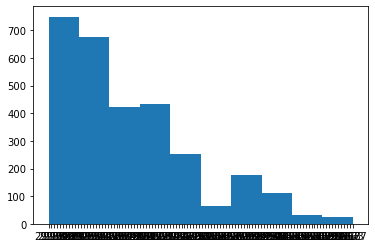

In [383]:
plt.hist(weather['stnpressure'])

In [384]:
weather['stnpressure'].describe()

count      2944
unique      104
top       29.34
freq        128
Name: stnpressure, dtype: object

In [385]:
count = 0
for i in weather['stnpressure']:
    if i == "M":
        count += 1
print(count)

4


In [386]:
weather[weather['stnpressure'] =="M"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
424,1,2009-06-26,86,69,78,7,60,67,0,13,...,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
1205,1,2013-08-10,81,64,73,0,57,63,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
43,2,2007-06-13,86,68,77,9,53,62,0,12,...,,0,M,0.0,0.00,M,M,7.0,5,M
1205,2,2013-08-10,81,68,75,2,55,63,0,10,...,,0,M,0.0,0.00,M,30.07,6.0,6,7.4


In [387]:
weather[weather['date'] =="2009-06-26"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
424,1,2009-06-26,86,69,78,7,60,67,0,13,...,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
424,2,2009-06-26,86,72,79,8,61,67,0,14,...,,0,M,0.0,0.00,29.20,29.83,6.4,4,8.0


In [388]:
weather.iloc[424,-5] = 29.20

In [389]:
weather[weather['date'] =="2013-08-10"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1205,1,2013-08-10,81,64,73,0,57,63,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
1205,2,2013-08-10,81,68,75,2,55,63,0,10,...,,0,M,0.0,0.00,M,30.07,6.0,6,7.4


We will just use the stn pressure from day before

In [390]:
weather[weather['date'] =="2013-08-09"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1204,1,2013-08-09,82,59,71,-2,60,65,0,6,...,,0,M,0.0,T,29.28,29.98,4.7,27,5.3
1204,2,2013-08-09,84,62,73,0,58,65,0,8,...,,0,M,0.0,0.00,29.34,29.97,4.9,27,5.6


In [391]:
weather.iloc[1205,-5] = 29.34

In [392]:
weather.iloc[2677,-5] = 29.34

In [393]:
weather[weather['date'] =="2007-06-13"]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
43,1,2007-06-13,87,60,74,6,53,62,0,9,...,,0,M,0.0,0.00,29.36,30.09,7.2,5,8.6
43,2,2007-06-13,86,68,77,9,53,62,0,12,...,,0,M,0.0,0.00,M,M,7.0,5,M


In [394]:
weather.iloc[1515,-5] = 29.36

## SeaLevel

(array([619., 473., 330., 568., 402., 210., 156.,  95.,  61.,  30.]),
 array([  0. ,  10.1,  20.2,  30.3,  40.4,  50.5,  60.6,  70.7,  80.8,
         90.9, 101. ]),
 <BarContainer object of 10 artists>)

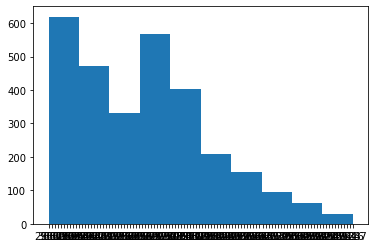

In [395]:
plt.hist(weather['sealevel'])

In [396]:
weather['sealevel'].describe()

count      2944
unique      102
top       30.00
freq         96
Name: sealevel, dtype: object

In [397]:
count = 0
for i in weather['sealevel']:
    if i == "M":
        count += 1
print(count)

9


In [398]:
weather.reset_index(inplace = True)

In [399]:
weather[weather['sealevel'] =="M"]

,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
416,416,1,2009-06-18,80,61,71,1,63,67,0,...,RA BR,0,M,0.0,0.12,29.08,M,6.7,16,7.9
497,497,1,2009-09-07,77,59,68,1,59,62,0,...,BR,0,M,0.0,0.00,29.39,M,5.8,3,4.0
866,866,1,2011-09-08,75,57,66,0,53,59,0,...,RA,0,M,0.0,T,29.34,M,13.0,2,13.4
878,878,1,2011-09-20,74,49,62,0,54,58,3,...,MIFG BCFG BR,0,M,0.0,0.00,29.26,M,7.3,18,7.3
1045,1045,1,2012-09-03,88,71,80,12,70,73,0,...,BR,0,M,0.0,0.00,29.17,M,4.6,6,4.4
1515,43,2,2007-06-13,86,68,77,9,53,62,0,...,,0,M,0.0,0.00,29.36,M,7.0,5,M
2344,872,2,2011-09-14,60,48,54,-10,45,51,11,...,RA BR HZ FU,0,M,0.0,T,29.47,M,6.0,32,M
2505,1033,2,2012-08-22,84,72,78,7,51,61,0,...,,0,M,0.0,0.00,29.39,M,4.7,19,M
2843,1371,2,2014-07-23,76,64,70,-4,56,61,0,...,,0,M,0.0,0.00,29.47,M,16.4,2,16.7


In [400]:
weather[weather['date'] == "2009-06-18"]

,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
416,416,1,2009-06-18,80,61,71,1,63,67,0,...,RA BR,0,M,0.0,0.12,29.08,M,6.7,16,7.9
1888,416,2,2009-06-18,81,63,72,2,64,67,0,...,TSRA BR HZ,0,M,0.0,0.11,29.15,29.79,3.7,17,5.8


In [401]:
weather.iloc[416,-4] = 29.79

In [402]:
weather[weather['date'] == "2009-09-07"]

,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
497,497,1,2009-09-07,77,59,68,1,59,62,0,...,BR,0,M,0.0,0.00,29.39,M,5.8,3,4.0
1969,497,2,2009-09-07,77,63,70,3,59,63,0,...,BR HZ,0,M,0.0,0.00,29.44,30.09,6.3,4,6.9


In [403]:
weather.iloc[497,-4] = 30.09

In [404]:
weather[weather['date'] == "2011-09-08"]

,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
866,866,1,2011-09-08,75,57,66,0,53,59,0,...,RA,0,M,0.0,T,29.34,M,13.0,2,13.4
2338,866,2,2011-09-08,74,62,68,2,54,59,0,...,RA DZ BR,0,M,0.0,0.06,29.36,30.03,14.9,2,15.2


In [405]:
weather.iloc[866,-4] = 30.03

In [406]:
weather[weather['date'] == "2011-09-20"]

,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
878,878,1,2011-09-20,74,49,62,0,54,58,3,...,MIFG BCFG BR,0,M,0.0,0.00,29.26,M,7.3,18,7.3
2350,878,2,2011-09-20,75,53,64,2,54,58,1,...,FG+ BCFG BR,0,M,0.0,0.01,29.33,29.99,5.8,17,6.1


In [407]:
weather.iloc[878,-4] = 29.99

In [408]:
weather[weather['date'] == "2012-09-03"]

,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1045,1045,1,2012-09-03,88,71,80,12,70,73,0,...,BR,0,M,0.0,0.00,29.17,M,4.6,6,4.4
2517,1045,2,2012-09-03,87,73,80,12,69,73,0,...,,0,M,0.0,0.00,29.23,29.87,5.0,7,5.9


In [409]:
weather.iloc[1045,-4] = 29.87

In [410]:
#problem
weather[weather['date'] == "2007-06-13"]

,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
43,43,1,2007-06-13,87,60,74,6,53,62,0,...,,0,M,0.0,0.00,29.36,30.09,7.2,5,8.6
1515,43,2,2007-06-13,86,68,77,9,53,62,0,...,,0,M,0.0,0.00,29.36,M,7.0,5,M


In [411]:
weather.iloc[1515,-4] = 30.09

In [412]:
weather[weather['date'] == "2011-09-14"]

,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
872,872,1,2011-09-14,58,47,53,-11,43,49,12,...,RA BR HZ FU,0,M,0.0,0.08,29.39,30.09,6.3,34,7.3
2344,872,2,2011-09-14,60,48,54,-10,45,51,11,...,RA BR HZ FU,0,M,0.0,T,29.47,M,6.0,32,M


In [413]:
weather.iloc[2344,-4] = 30.09

In [414]:
weather[weather['date'] == "2012-08-22"]

,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1033,1033,1,2012-08-22,85,54,70,-1,52,60,0,...,,0,M,0.0,0.00,29.35,30.07,5.5,19,5.8
2505,1033,2,2012-08-22,84,72,78,7,51,61,0,...,,0,M,0.0,0.00,29.39,M,4.7,19,M


In [415]:
weather.iloc[2505,-4] = 30.07

In [416]:
weather[weather['date'] == "2014-07-23"]

,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1371,1371,1,2014-07-23,75,59,67,-7,51,58,0,...,,0,M,0.0,0.00,29.41,30.12,15.7,2,16.1
2843,1371,2,2014-07-23,76,64,70,-4,56,61,0,...,,0,M,0.0,0.00,29.47,M,16.4,2,16.7


In [417]:
weather.iloc[2843,-4] = 30.12

In [418]:
count = 0
for i in weather['sealevel']:
    if i == "M":
        count += 1
print(count)

0


## ResultSpeed

(array([244., 663., 800., 611., 367., 170.,  57.,  18.,   9.,   5.]),
 array([ 0.1,  2.5,  4.9,  7.3,  9.7, 12.1, 14.5, 16.9, 19.3, 21.7, 24.1]),
 <BarContainer object of 10 artists>)

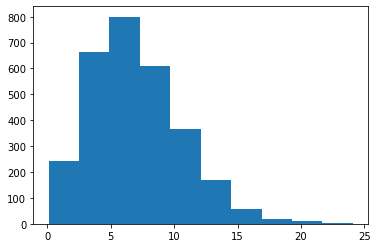

In [419]:
plt.hist(weather['resultspeed'])

In [420]:
weather['resultspeed'].describe()

count    2944.000000
mean        6.960666
std         3.587527
min         0.100000
25%         4.300000
50%         6.400000
75%         9.200000
max        24.100000
Name: resultspeed, dtype: float64

## ResultDir

(array([432., 322., 235., 137., 234., 412., 482., 255., 243., 192.]),
 array([ 1. ,  4.5,  8. , 11.5, 15. , 18.5, 22. , 25.5, 29. , 32.5, 36. ]),
 <BarContainer object of 10 artists>)

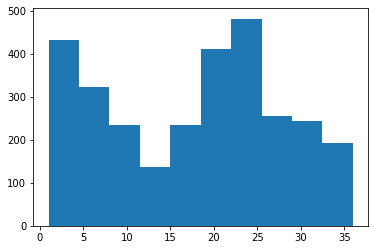

In [421]:
plt.hist(weather['resultdir'])

In [422]:
weather['resultdir'].describe()

count    2944.000000
mean       17.494905
std        10.063609
min         1.000000
25%         7.000000
50%        19.000000
75%        25.000000
max        36.000000
Name: resultdir, dtype: float64

## AvgSpeed

(array([434., 481., 548., 479., 285., 308., 212., 121.,  54.,  22.]),
 array([  0. ,  17.7,  35.4,  53.1,  70.8,  88.5, 106.2, 123.9, 141.6,
        159.3, 177. ]),
 <BarContainer object of 10 artists>)

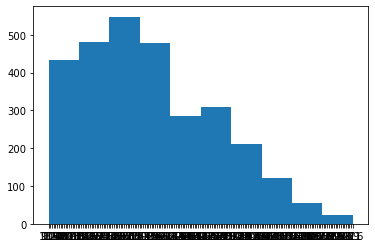

In [424]:
plt.hist(weather['avgspeed'])

In [425]:
weather['avgspeed'].describe()

count     2944
unique     178
top        6.9
freq        63
Name: avgspeed, dtype: object

In [426]:
count = 0
for i in weather['avgspeed']:
    if i == "M":
        count += 1
print(count)

3


In [427]:
weather[weather['avgspeed']=="M"]

,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1515,43,2,2007-06-13,86,68,77,9,53,62,0,...,,0,M,0.0,0.00,29.36,30.09,7.0,5,M
2344,872,2,2011-09-14,60,48,54,-10,45,51,11,...,RA BR HZ FU,0,M,0.0,T,29.47,30.09,6.0,32,M
2505,1033,2,2012-08-22,84,72,78,7,51,61,0,...,,0,M,0.0,0.00,29.39,30.07,4.7,19,M


In [428]:
weather[weather['date'] == "2007-06-13"]


,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
43,43,1,2007-06-13,87,60,74,6,53,62,0,...,,0,M,0.0,0.00,29.36,30.09,7.2,5,8.6
1515,43,2,2007-06-13,86,68,77,9,53,62,0,...,,0,M,0.0,0.00,29.36,30.09,7.0,5,M


In [429]:
weather.iloc[1515,-1] = 8.6

In [430]:
weather[weather['date'] == "2011-09-14"]


,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
872,872,1,2011-09-14,58,47,53,-11,43,49,12,...,RA BR HZ FU,0,M,0.0,0.08,29.39,30.09,6.3,34,7.3
2344,872,2,2011-09-14,60,48,54,-10,45,51,11,...,RA BR HZ FU,0,M,0.0,T,29.47,30.09,6.0,32,M


In [431]:
weather.iloc[2344,-1] = 7.3

In [432]:
weather[weather['date'] == "2012-08-22"]


,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1033,1033,1,2012-08-22,85,54,70,-1,52,60,0,...,,0,M,0.0,0.00,29.35,30.07,5.5,19,5.8
2505,1033,2,2012-08-22,84,72,78,7,51,61,0,...,,0,M,0.0,0.00,29.39,30.07,4.7,19,M


In [433]:
weather.iloc[2505,-1] = 5.8

In [445]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        2944 non-null   int64         
 1   station      2944 non-null   int64         
 2   date         2944 non-null   datetime64[ns]
 3   tmax         2944 non-null   int64         
 4   tmin         2944 non-null   int64         
 5   tavg         2944 non-null   int64         
 6   depart       2944 non-null   int64         
 7   dewpoint     2944 non-null   int64         
 8   wetbulb      2944 non-null   int64         
 9   heat         2944 non-null   int64         
 10  cool         2944 non-null   int64         
 11  sunrise      2944 non-null   int64         
 12  sunset       2944 non-null   object        
 13  codesum      2944 non-null   object        
 14  depth        2944 non-null   int64         
 15  water1       2944 non-null   object        
 16  snowfa

In [435]:
weather.wetbulb = weather.wetbulb.astype('int64')

In [436]:
weather.heat = weather.heat.astype('int64')

In [437]:
weather.cool = weather.cool.astype('int64')

In [438]:
weather.sunrise = weather.sunrise.astype('int64')

In [446]:
#weather.snowfall = weather.snowfall.astype('int64')

In [447]:
#weather.preciptotal = weather.preciptotal.astype('int64')

In [448]:
#weather.stnpressure = weather.stnpressure.astype('int64')

In [449]:
#weather.avgspeed = weather.avgspeed.astype('int64')

## Merging train and weather dataframes

In [450]:
# store weather data for station 1 and 2 separately
station1 = weather[weather['station']==1].copy()
station2 = weather[weather['station']==2].copy()

In [451]:
"""
station1['latitude'] = 41.995
station1['longitude'] = -87.9336


station2['latitude'] = 41.78611
station2['longitude'] = -87.75222
"""

"\nstation1['latitude'] = 41.995\nstation1['longitude'] = -87.9336\n\n\nstation2['latitude'] = 41.78611\nstation2['longitude'] = -87.75222\n"

In [452]:
weather

,index,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,0,1,2007-05-01,83,50,67,14,51,56,0,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,1,1,2007-05-02,59,42,51,-3,42,47,14,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,2,1,2007-05-03,66,46,56,2,40,48,9,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
3,3,1,2007-05-04,66,49,58,4,41,50,7,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
4,4,1,2007-05-05,66,53,60,5,38,49,5,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,1467,2,2014-10-27,79,54,67,19,52,59,0,...,RA,0,M,0.0,0.02,29.00,29.67,12.7,19,13.6
2940,1468,2,2014-10-28,66,48,57,10,40,48,8,...,RA,0,M,0.0,0.03,29.23,29.85,14.0,26,14.6
2941,1469,2,2014-10-29,49,40,45,-2,34,42,20,...,,0,M,0.0,0.00,29.42,30.07,8.5,29,9.0
2942,1470,2,2014-10-30,53,37,45,-1,35,42,20,...,RA,0,M,0.0,T,29.41,30.10,5.9,23,6.5


In [453]:
weather.drop(columns=["index"],inplace = True)

In [454]:
# train_loc = train[['id', 'latitude', 'longitude']].copy()

In [455]:
# create 2 columns to show the distance of each trap to weather station1 and station2
# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
train['dist_s1'] = train.apply(
    lambda row: ((row['latitude'] - 41.995)**2 + (row['longitude'] - (-87.9336))**2)**0.5,
    axis = 1
)

# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
train['dist_s2'] = train.apply(
    lambda row: ((row['latitude'] - 41.78611)**2 + (row['longitude'] - (-87.75222))**2)**0.5,
    axis = 1
)


In [456]:
# create a column to indicate the nearest weather station - 1 or 2 - for each trap
train['nearest_stat'] = train.apply(
    lambda row: 1 if row['dist_s1'] > row['dist_s2'] else 2,
    axis = 1
)

In [457]:
df = pd.merge(train, weather, how='left', left_on= ['date', 'nearest_stat'], right_on = ['date', 'station'])

In [458]:
df[['date', 'address', 'species', 'trap', 'nearest_stat']].head()

,date,address,species,trap,nearest_stat
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,T002,2
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,T002,2
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,T007,2
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,T015,2
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,T015,2


In [459]:
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,id,dist_s1,dist_s2,nearest_stat
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,0,0.138600,0.175493,2
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,0.138600,0.175493,2
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2,0.164321,0.209576,2
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,3,0.110780,0.201509,2
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,4,0.110780,0.201509,2
